In [337]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly
import plotly.graph_objs as go
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

# Go Offline
init_notebook_mode()
cf.go_offline()

In [338]:
df = pd.read_csv('./flyertalk_cx.csv')

In [339]:
df.head()

id                                         thread_url  \
0  490601  http://www.flyertalk.com/forum/cathay-pacific-...   
1  490602  http://www.flyertalk.com/forum/cathay-pacific-...   
2  490600  http://www.flyertalk.com/forum/cathay-pacific-...   
3  490598  http://www.flyertalk.com/forum/cathay-pacific-...   
4  490599  http://www.flyertalk.com/forum/cathay-pacific-...   

                                        thread_title             datehere  \
0  Transferring from international Cathay flight ...  2005-12-11 03:38:00   
1  Transferring from international Cathay flight ...  2005-12-11 05:07:00   
2  Transferring from international Cathay flight ...  2005-12-10 19:01:00   
3  Transferring from international Cathay flight ...  2005-12-10 07:43:00   
4  Transferring from international Cathay flight ...  2005-12-10 11:43:00   

     posted_by                                            content  \
0  Norway_Asia  Looks like you changed you mind in 8 minutes t...   
1     glorialf  <div style=\"float:right;padding:5px;\">\n\t<!...   
2      Chiangi  After you clear passport control, pick up lugg...   
3     glorialf  Thanks. One more (actually two more) questions...   
4    Unterwegs  I connected a few month ago from CX to Bangkok...   

                                         content_use     score  
0  ooks like you changed you mind in 8 minutes to...  0.808015  
1                                              /div>  0.000000  
2  fter you clear passport control, pick up lugga...  0.826811  
3  hanks. One more (actually two more) questions....  0.588937  
4   connected a few month ago from CX to Bangkok ...  0.745233

In [340]:
df.shape

(241244, 8)

In [341]:
df.isnull().sum()

id                 0
thread_url         0
thread_title     313
datehere           0
posted_by        124
content           87
content_use     3279
score              0
dtype: int64

In [342]:
df.dtypes

id                int64
thread_url       object
thread_title     object
datehere         object
posted_by        object
content          object
content_use      object
score           float64
dtype: object

In [343]:
df.describe()

id          score
count  2.412440e+05  241244.000000
mean   5.761595e+05       0.539324
std    8.800896e+04       0.332535
min    4.433190e+05       0.000000
25%    5.037538e+05       0.239704
50%    5.763695e+05       0.573069
75%    6.435402e+05       0.848841
max    1.445178e+06       1.000000

Cleaning the Data:
- Remove the missing values
- Change datehere to datetime

EDA
- Idenify the top users by number of posts they made e.g. value_count of posted_by
- remove infrequent users (e.g. less than 5 post)
- Track the change of sentiment of top users over time e.g. sentiment vs time
- distribution of scores
- length of post vs sentiment
- length of post vs frequency of post
- most common words

What problem I'm trying to solve (problem statement)
What the result should looks like? (expected result)
What other data do I need?

In [344]:
df = df.dropna(how='any')
df.shape

(237616, 8)

In [351]:
import datetime as dt

df['datehere'] = pd.to_datetime(df['datehere'])
df['datehere'] = df.datehere.dt.date

df.datehere = pd.to_datetime(df.datehere)
df.dtypes

id                       int64
thread_url              object
thread_title            object
datehere        datetime64[ns]
posted_by               object
content                 object
content_use             object
score                  float64
dtype: object

In [352]:
df.posted_by.value_counts()

percysmith           11420
QRC3288               6814
cxfan1960             6650
Cathay Boy            6223
sxc                   6092
kaka                  4284
Guy Betsy             3556
christep              3229
ernestnywang          2644
CanucksHKG            2264
alphaod               2238
midlevels             2111
correctioncx          2033
ChrisLi               1918
JALPak                1849
LHR/MEL/Europe FF     1742
maortega15            1612
Dr. HFH               1409
FlyPointyEnd          1383
garykung              1303
mayodave              1207
CX828                 1192
CrazyJ82              1176
brunos                1169
jagmeets              1147
fakecd                1135
kchika                1123
G-CIVC                1028
IncyWincy             1014
jamienbaker            998
                     ...  
AC A380                  1
w2274                    1
Papa Hotel               1
wrekker platinum         1
e8168j                   1
loopingkuma              1
j

percysmith with 11k post is probably the moderator

need to remove all the people with infrequent post to remove the long tails and get a better picture

In [353]:
# removing rows whose user post less than a certain amount of times

threshold = 50
value_counts = df['posted_by'].value_counts()
to_remove = value_counts[value_counts < threshold].index
df['posted_by'].replace(to_remove, np.nan, inplace=True)

df2 = df.dropna(how='any')
df2.shape

(186576, 8)

In [354]:
df2.head()

id                                         thread_url  \
2  490600  http://www.flyertalk.com/forum/cathay-pacific-...   
4  490599  http://www.flyertalk.com/forum/cathay-pacific-...   
5  490597  http://www.flyertalk.com/forum/cathay-pacific-...   
6  490595  http://www.flyertalk.com/forum/cathay-pacific-...   
7  490596  http://www.flyertalk.com/forum/cathay-pacific-...   

                                        thread_title   datehere  posted_by  \
2  Transferring from international Cathay flight ... 2005-12-10    Chiangi   
4  Transferring from international Cathay flight ... 2005-12-10  Unterwegs   
5  Transferring from international Cathay flight ... 2005-12-10  Guy Betsy   
6  Transferring from international Cathay flight ... 2005-12-09  Guy Betsy   
7  Transferring from international Cathay flight ... 2005-12-10      tedhl   

                                             content  \
2  After you clear passport control, pick up lugg...   
4  I connected a few month ago from CX to Bangkok...   
5  <div style=\"max-width:75%; width:auto; margin...   
6  Unless you take TG, when the transfer is \'int...   
7  <div style=\"max-width:75%; width:auto; margin...   

                                         content_use     score  
2  fter you clear passport control, pick up lugga...  0.826811  
4   connected a few month ago from CX to Bangkok ...  0.745233  
5  People who are to clear immigration at CNX wil...  0.909336  
6  nless you take TG, when the transfer is \\\'in...  0.934047  
7  assuming on the BKK-ChiangMai flight there\'s ...  0.279150

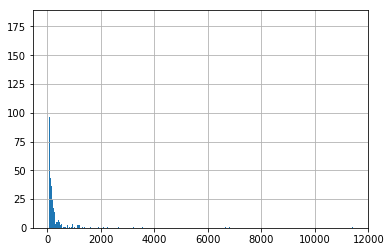

In [356]:
df2.posted_by.value_counts().hist(bins=500)
plt.show()
plt.figure(figsize=(40,20))

In [360]:
df2.posted_by.value_counts().iplot(kind='hist', bins=200)

In [357]:
df2.posted_by.value_counts().iplot(kind='bar')


In [358]:
df2.score.iplot(kind='hist')

In [361]:
df2 = df2.drop('thread_url', axis=1)
df2 = df2.drop('content', axis=1)
df2.head()

id                                       thread_title   datehere  \
2  490600  Transferring from international Cathay flight ... 2005-12-10   
4  490599  Transferring from international Cathay flight ... 2005-12-10   
5  490597  Transferring from international Cathay flight ... 2005-12-10   
6  490595  Transferring from international Cathay flight ... 2005-12-09   
7  490596  Transferring from international Cathay flight ... 2005-12-10   

   posted_by                                        content_use     score  
2    Chiangi  fter you clear passport control, pick up lugga...  0.826811  
4  Unterwegs   connected a few month ago from CX to Bangkok ...  0.745233  
5  Guy Betsy  People who are to clear immigration at CNX wil...  0.909336  
6  Guy Betsy  nless you take TG, when the transfer is \\\'in...  0.934047  
7      tedhl  assuming on the BKK-ChiangMai flight there\'s ...  0.279150

In [362]:
# Add features: title length and content length to DF

df2['title_len'] = df2.thread_title.apply(lambda x : len(x.split(' ')))
df2['content_len'] = df2.content_use.apply(lambda x : len(x.split(' ')))
df2.head()

id                                       thread_title   datehere  \
2  490600  Transferring from international Cathay flight ... 2005-12-10   
4  490599  Transferring from international Cathay flight ... 2005-12-10   
5  490597  Transferring from international Cathay flight ... 2005-12-10   
6  490595  Transferring from international Cathay flight ... 2005-12-09   
7  490596  Transferring from international Cathay flight ... 2005-12-10   

   posted_by                                        content_use     score  \
2    Chiangi  fter you clear passport control, pick up lugga...  0.826811   
4  Unterwegs   connected a few month ago from CX to Bangkok ...  0.745233   
5  Guy Betsy  People who are to clear immigration at CNX wil...  0.909336   
6  Guy Betsy  nless you take TG, when the transfer is \\\'in...  0.934047   
7      tedhl  assuming on the BKK-ChiangMai flight there\'s ...  0.279150   

   title_len  content_len  
2         11           87  
4         11          282  
5         11           53  
6         11           38  
7         11           44

In [363]:
# Checking for correlation b/w variable...looks like there are no strong correlations

df2.corr()

id     score  title_len  content_len
id           1.000000 -0.004140  -0.115468     0.007948
score       -0.004140  1.000000  -0.017001     0.056289
title_len   -0.115468 -0.017001   1.000000     0.025478
content_len  0.007948  0.056289   0.025478     1.000000

In [364]:
# number of people posting on the forums after filter
len(df2.posted_by.value_counts())

642

In [365]:
# number of post on forums after filter
len(df.thread_title.value_counts())

13046

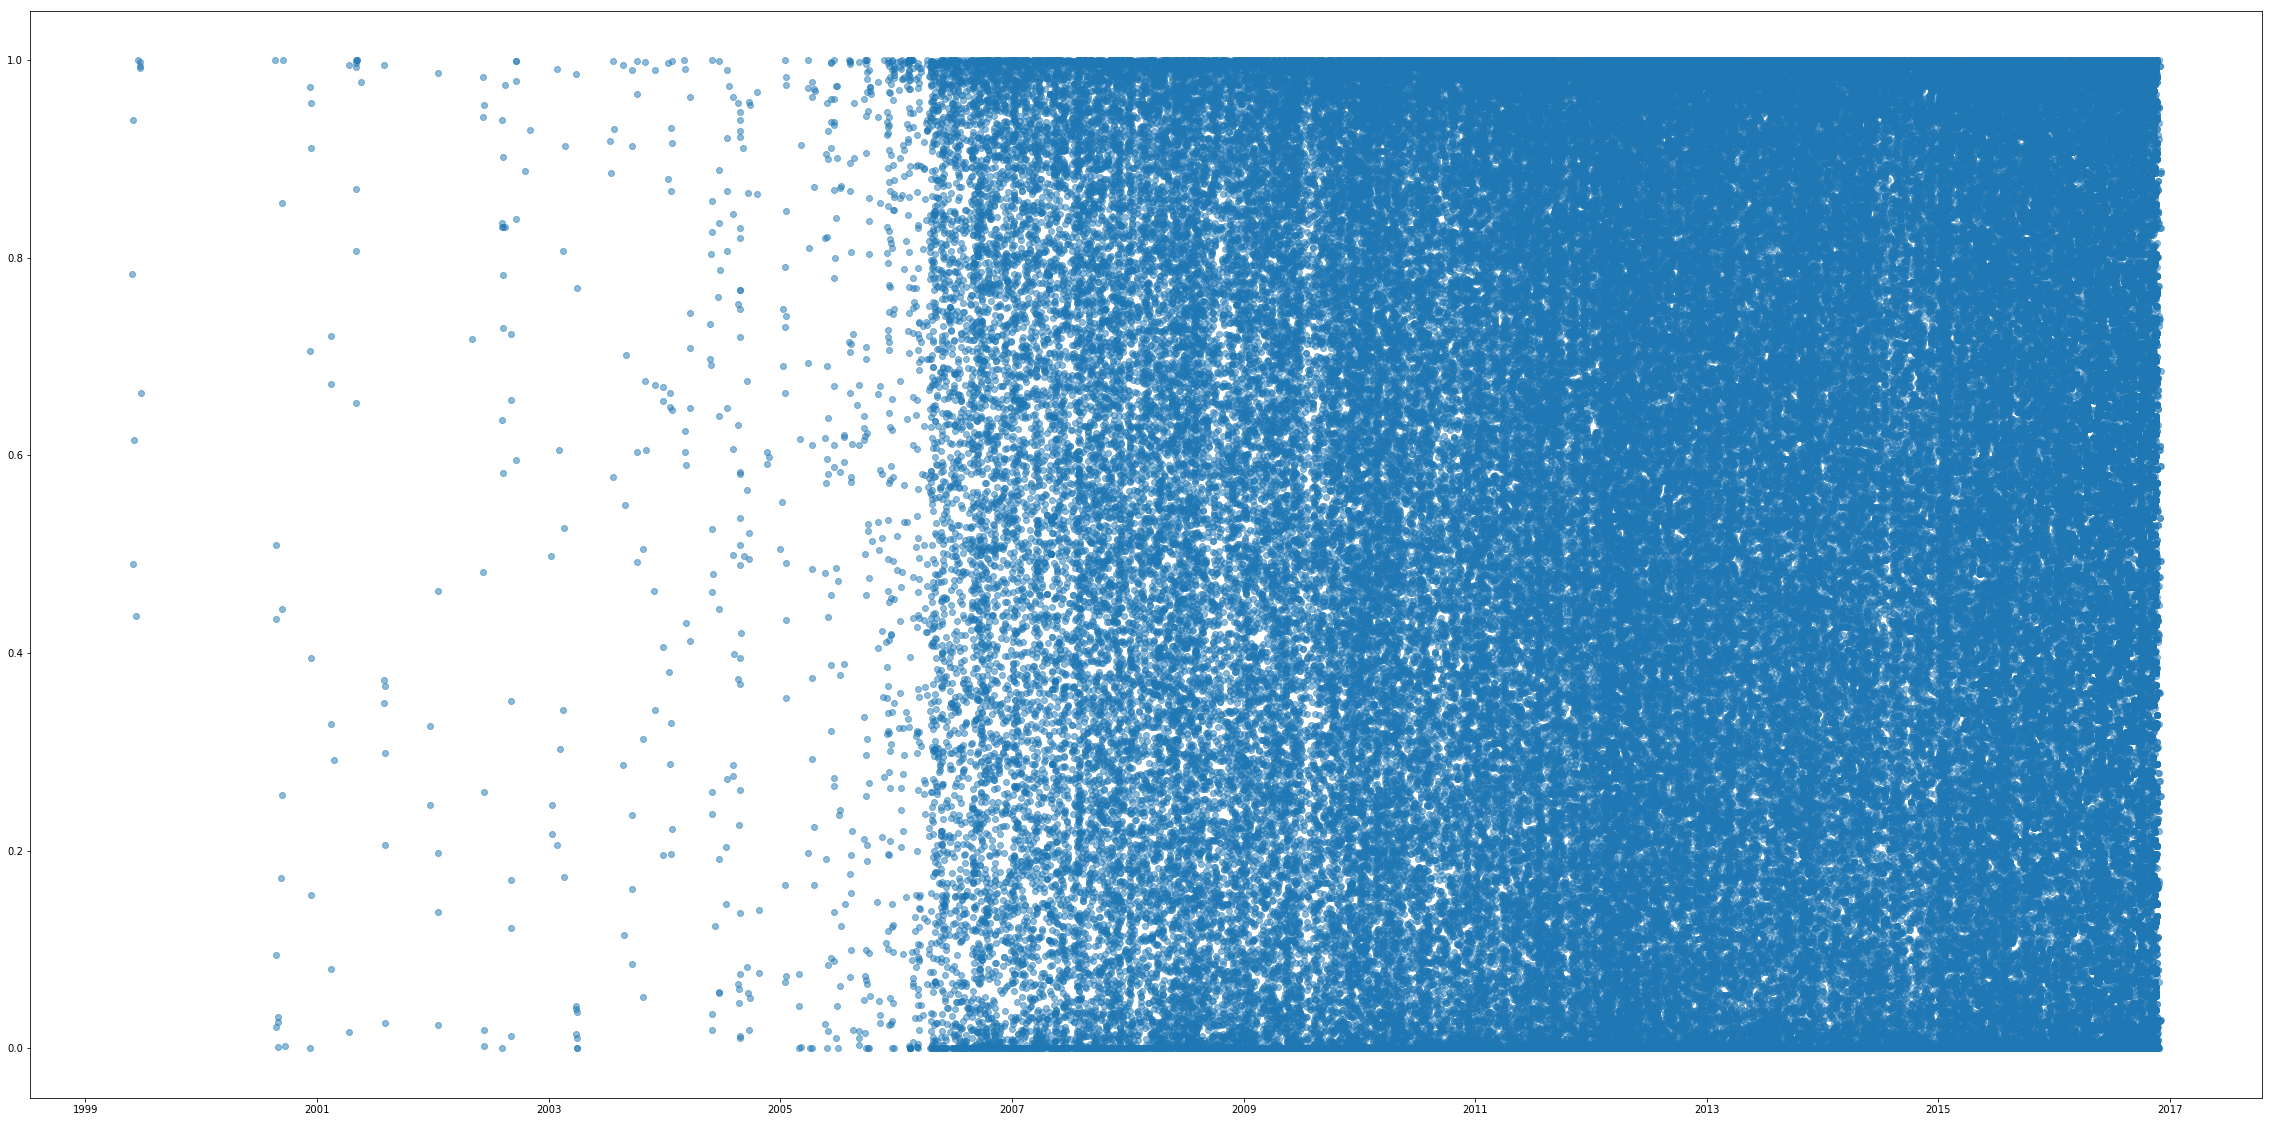

In [366]:
plt.plot_date(df2['datehere'], df2['score'], alpha = 0.5)
plt.show()
plt.figure(figsize=(40,20))

In [ ]:
# need to filter out some datapoints to make sense 
# can try only focusing on the 6 month period of MarcoPolo rule changes
# changes went into effect on 15 April 2016
# - Look at Oct 15, 2015 to April 15, 2016 (6 months prior)
# - Look at Jan 15, 2015 to July 15, 2016 (3 months prior & 3 months after)

# further analysis: 
# - most common word (& their counts)
# - idenify the most top 15% most active users and analyize their sentiment changes
# - number of post with score above 0.5 and number of post with score below 0.5

In [ ]:
# arrange df by dates and extract the date range we want to examine...

# df_date = df2.set_index('datehere').sort()
# df_date.head()

In [374]:
# - Look at Oct 15, 2015 to April 15, 2016 (6 months prior)

time_select = (df2['datehere'] > '2015-10-14') & (df2['datehere'] <= '2016-4-15')
df_6mth = df2.loc[time_select]
df_6mth.head()

id           thread_title   datehere   posted_by  \
1502  489040  Redeem AM suggestions 2016-04-07        asv2   
1516  489039  Redeem AM suggestions 2016-04-07  LchChester   
1517  489038  Redeem AM suggestions 2016-04-06       Guava   
1518  489037  Redeem AM suggestions 2016-04-06       Guava   
1519  489035  Redeem AM suggestions 2016-04-05  LchChester   

                                            content_use     score  title_len  \
1502  ow, FT is such a great place and this is defin...  0.895867          3   
1516  Agree. OP can call the hotline to book.\r\nYou...  0.967016          3   
1517  In addition to making the trip eligible for On...  0.574778          3   
1518  Since the itinerary suggested to you contain 3...  0.988015          3   
1519  an you route yourself via Japan (adding JL) an...  0.806957          3   

      content_len  
1502           34  
1516           28  
1517           78  
1518          251  
1519           43

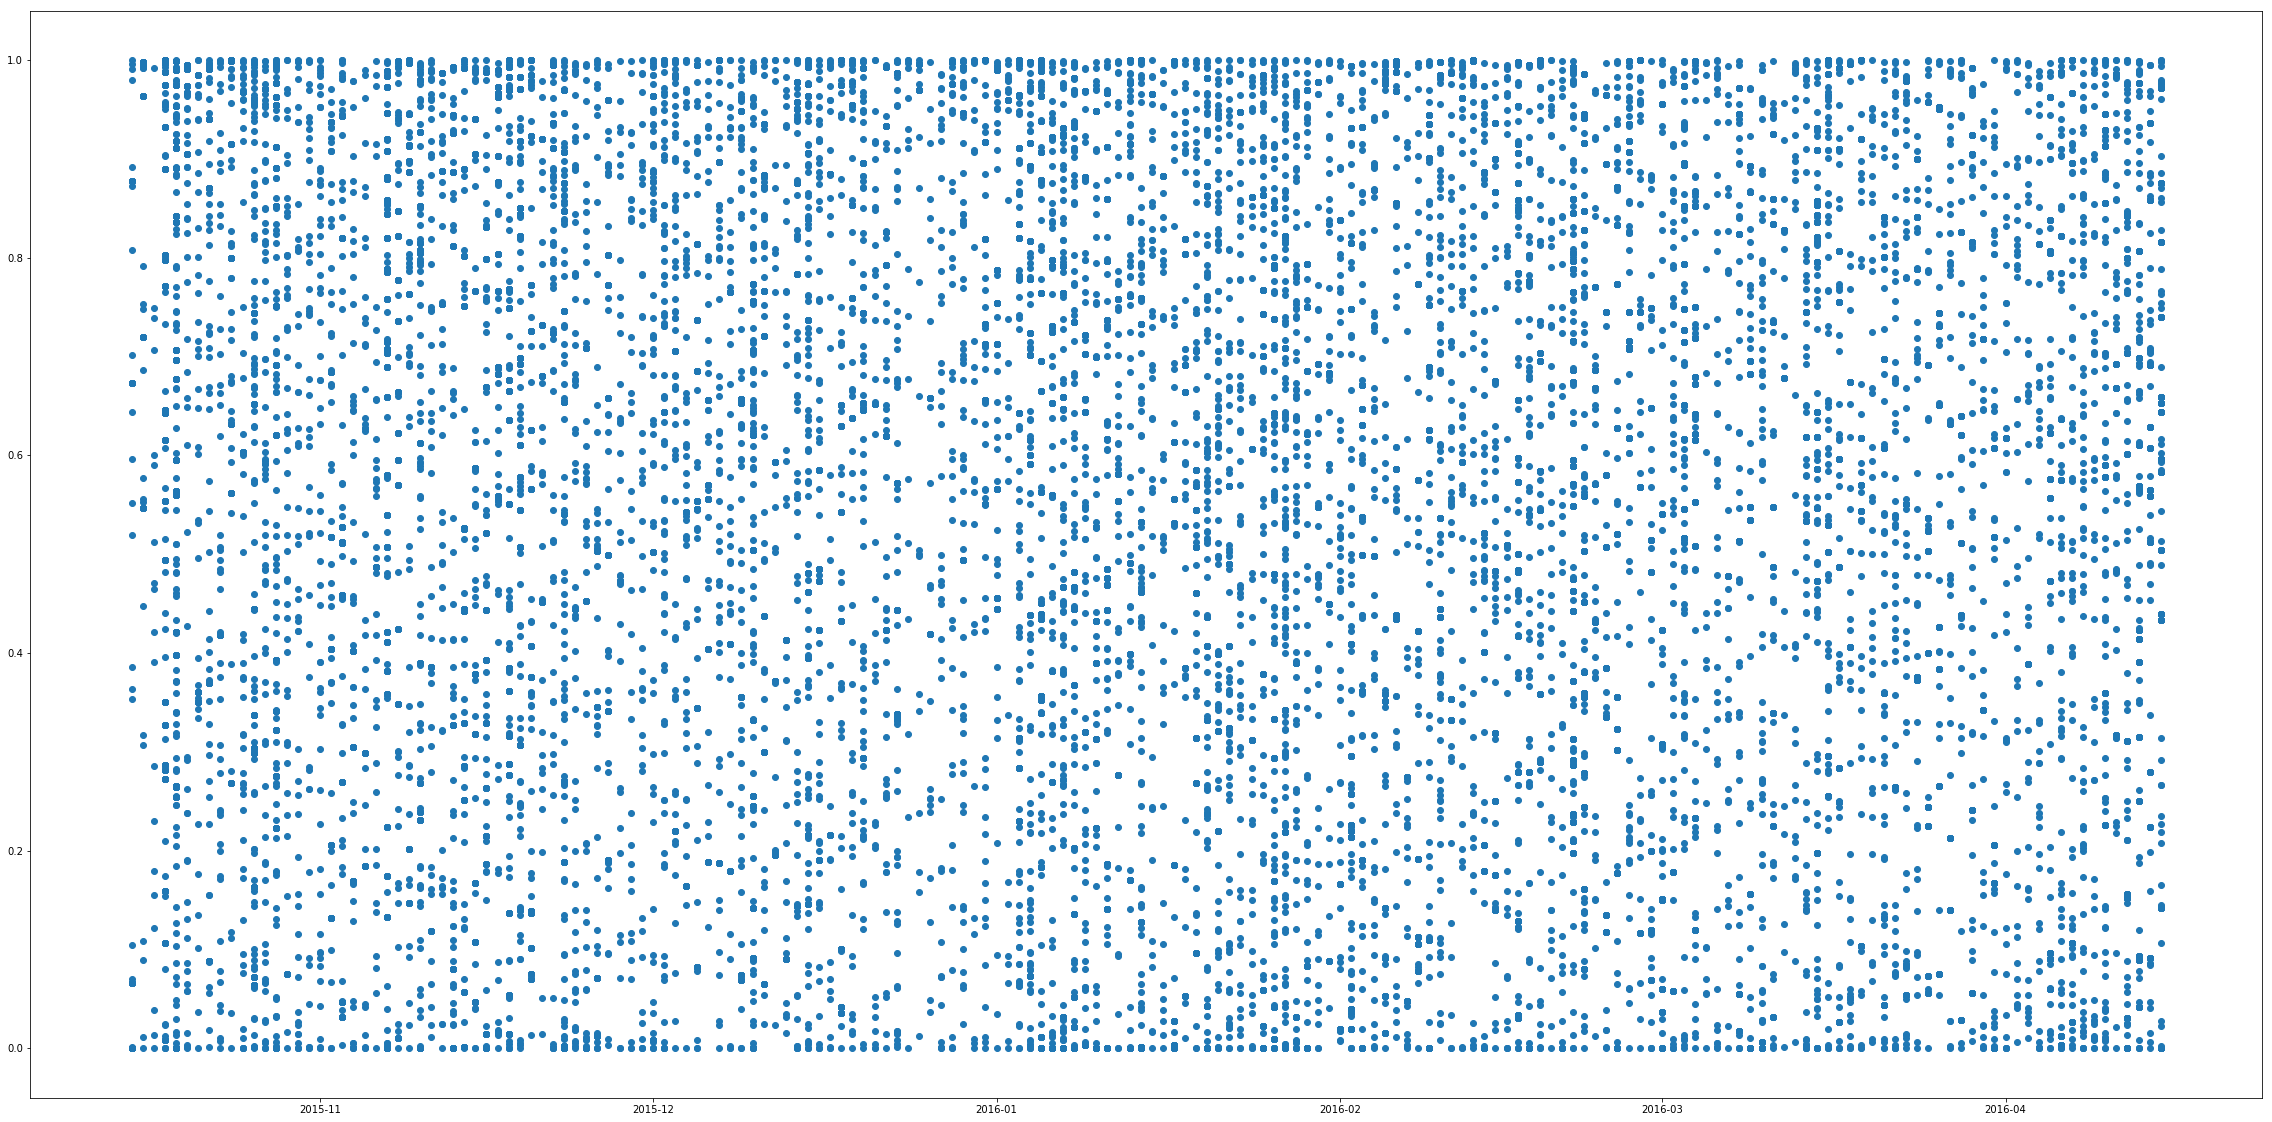

In [376]:
plt.plot_date(df_6mth['datehere'], df_6mth['score'], alpha = 2.0)
plt.show()
plt.figure(figsize=(40,20))

Count the number of postive posts (score > 0.5) and negative posts (score < 0.5) to see if there's a change in them during the 6 months period

In [377]:
df_6mth['Postive'] = df_6mth.score > 0.5
df_6mth.head()

/Users/alexandervong/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



id           thread_title   datehere   posted_by  \
1502  489040  Redeem AM suggestions 2016-04-07        asv2   
1516  489039  Redeem AM suggestions 2016-04-07  LchChester   
1517  489038  Redeem AM suggestions 2016-04-06       Guava   
1518  489037  Redeem AM suggestions 2016-04-06       Guava   
1519  489035  Redeem AM suggestions 2016-04-05  LchChester   

                                            content_use     score  title_len  \
1502  ow, FT is such a great place and this is defin...  0.895867          3   
1516  Agree. OP can call the hotline to book.\r\nYou...  0.967016          3   
1517  In addition to making the trip eligible for On...  0.574778          3   
1518  Since the itinerary suggested to you contain 3...  0.988015          3   
1519  an you route yourself via Japan (adding JL) an...  0.806957          3   

      content_len Postive  
1502           34    True  
1516           28    True  
1517           78    True  
1518          251    True  
1519           43    True

In [378]:
df_6mth.Postive.value_counts()

True     9831
False    6876
Name: Postive, dtype: int64

In [413]:
df_6mth.groupby(['datehere'])['Postive'].value_counts()

datehere    Postive
2015-10-15  True        26
            False       22
2015-10-16  True        45
            False        7
2015-10-17  False       12
            True         7
2015-10-18  True       125
            False       78
2015-10-19  True       148
            False       90
2015-10-20  True        57
            False       20
2015-10-21  True        32
            False       26
2015-10-22  True        49
            False       33
2015-10-23  False       33
            True        23
2015-10-24  True        80
            False       13
2015-10-25  True        36
            False       28
2015-10-26  True        84
            False       83
2015-10-27  True        48
            False       33
2015-10-28  True       112
            False       79
2015-10-29  True        32
            False       24
                      ... 
2016-04-01  True        25
            False       19
2016-04-02  True        23
            False       19
2016-04-03  False       26
        

In [ ]:
rank = (df_6mth['posted_by'].value_counts() / len(df_6mth) * 100)
rank = rank.to_frame()
rank = pd.Series(rank.index[:1])
rank
# rank['Name'] = rank.index
# rank = rank.rename(columns={'posted_by':'Activeness'})
# rank.Name[:50]

In [ ]:
top50 = df_6mth.loc[df_6mth['posted_by'].isin(rank)]
top50.shape
top50.head()

In [ ]:
plt.plot_date(top50.index, top50['score'])
plt.show()
# plt.figure(figsize=(40,20))